In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from catboost import CatBoostClassifier
import shap

# Charger les données
df = pd.read_csv('/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_SBA-modelisation/data/cleaned_data.csv')


/Users/khadijaaassi/Desktop/Simplon/Projet_devIA/Simplon_SBA-modelisation/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# df['MIS_Status'] = df['MIS_Status'].fillna(
#     df['ChgOffDate'].apply(lambda x: 'P I F' if pd.isna(x) else 'CHGOFF')
# )

# df['MIS_Status'].isna().sum()

In [13]:

# Définition des features et de la cible
features = ['State', 'NAICS', 'ApprovalFY', 'NewExist', 'RetainedJob', 
            'FranchiseCode', 'UrbanRural', 'GrAppv', 'SBA_Appv', 'Bank', 'Term']

X = df[features]
y = df['MIS_Status']

# Conversion des catégories en chaînes de caractères
cat_features = ['State', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'Bank']
for col in cat_features:
    X[col] = X[col].astype(str)

# Remplacement des valeurs NaN
X.fillna("Unknown", inplace=True)

# Séparation en train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y
)

# Définition du modèle CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100
)

# Entraînement du modèle avec déclaration des features catégoriques
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Calcul et affichage du ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/263872341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/263872341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/263872341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

0:	test: 0.8889072	best: 0.8889072 (0)	total: 413ms	remaining: 6m 52s
100:	test: 0.9734304	best: 0.9734304 (100)	total: 31.2s	remaining: 4m 37s
200:	test: 0.9780162	best: 0.9780162 (200)	total: 1m 1s	remaining: 4m 4s
300:	test: 0.9799178	best: 0.9799178 (300)	total: 1m 31s	remaining: 3m 33s
400:	test: 0.9810413	best: 0.9810413 (400)	total: 2m 3s	remaining: 3m 4s
500:	test: 0.9816997	best: 0.9816997 (500)	total: 2m 38s	remaining: 2m 37s
600:	test: 0.9821305	best: 0.9821305 (600)	total: 3m 10s	remaining: 2m 6s
700:	test: 0.9824796	best: 0.9824796 (700)	total: 3m 43s	remaining: 1m 35s
800:	test: 0.9826691	best: 0.9826691 (800)	total: 4m 15s	remaining: 1m 3s
900:	test: 0.9828666	best: 0.9828666 (900)	total: 4m 51s	remaining: 32s
999:	test: 0.9830422	best: 0.9830428 (998)	total: 5m 24s	remaining: 0us

bestTest = 0.9830428224
bestIteration = 998

Shrink model to first 999 iterations.

Matrice de confusion :
[[13450  2332]
 [ 1593 72542]]

Rapport de classification :
              precision  

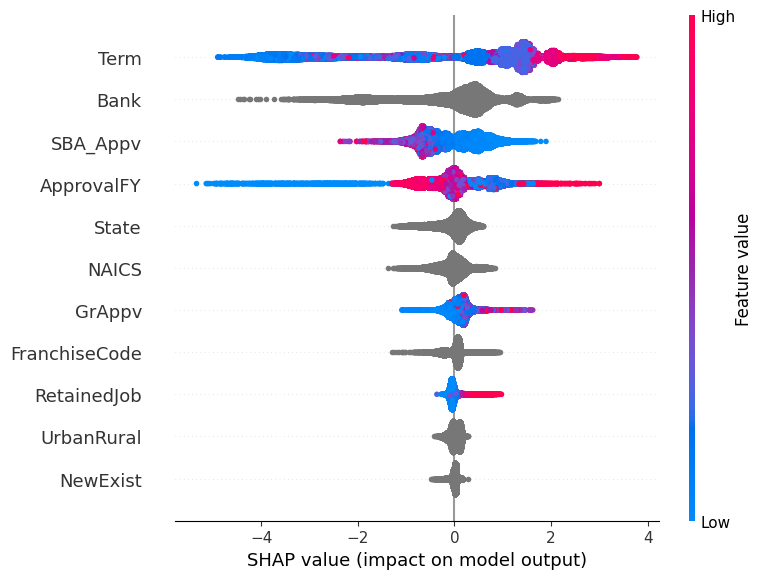

In [16]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [17]:

# Définition des features et de la cible
features = ['State', 'NAICS', 'ApprovalFY', 'NewExist', 'RetainedJob', 
            'FranchiseCode', 'UrbanRural', 'GrAppv', 'Bank', 'Term']

X = df[features]
y = df['MIS_Status']

# Conversion des catégories en chaînes de caractères
cat_features = ['State', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'Bank']
for col in cat_features:
    X[col] = X[col].astype(str)

# Remplacement des valeurs NaN
X.fillna("Unknown", inplace=True)

# Séparation en train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y
)

# Définition du modèle CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100
)

# Entraînement du modèle avec déclaration des features catégoriques
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Calcul et affichage du ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2251424224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2251424224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2251424224.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

0:	test: 0.8900307	best: 0.8900307 (0)	total: 368ms	remaining: 6m 7s
100:	test: 0.9728674	best: 0.9728674 (100)	total: 34.7s	remaining: 5m 8s
200:	test: 0.9780481	best: 0.9780481 (200)	total: 1m 6s	remaining: 4m 25s
300:	test: 0.9798894	best: 0.9798894 (300)	total: 1m 42s	remaining: 3m 58s
400:	test: 0.9808351	best: 0.9808351 (400)	total: 2m 16s	remaining: 3m 23s
500:	test: 0.9814819	best: 0.9814819 (500)	total: 2m 51s	remaining: 2m 50s
600:	test: 0.9818492	best: 0.9818492 (600)	total: 3m 25s	remaining: 2m 16s
700:	test: 0.9821144	best: 0.9821144 (700)	total: 3m 59s	remaining: 1m 42s
800:	test: 0.9823341	best: 0.9823342 (799)	total: 4m 34s	remaining: 1m 8s
900:	test: 0.9825153	best: 0.9825153 (900)	total: 5m 8s	remaining: 33.9s
999:	test: 0.9826760	best: 0.9826760 (999)	total: 5m 41s	remaining: 0us

bestTest = 0.9826760425
bestIteration = 999


Matrice de confusion :
[[13398  2384]
 [ 1656 72479]]

Rapport de classification :
              precision    recall  f1-score   support

     

In [18]:

# Définition des features et de la cible
features = ['State', 'NAICS',  'NewExist', 'RetainedJob', 
            'FranchiseCode', 'UrbanRural', 'GrAppv', 'Bank', 'Term']

X = df[features]
y = df['MIS_Status']

# Conversion des catégories en chaînes de caractères
cat_features = ['State', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'Bank']
for col in cat_features:
    X[col] = X[col].astype(str)

# Remplacement des valeurs NaN
X.fillna("Unknown", inplace=True)

# Séparation en train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y
)

# Définition du modèle CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100
)

# Entraînement du modèle avec déclaration des features catégoriques
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Calcul et affichage du ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/3129079575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/3129079575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/3129079575.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

0:	test: 0.8769011	best: 0.8769011 (0)	total: 507ms	remaining: 8m 26s
100:	test: 0.9700137	best: 0.9700137 (100)	total: 37.5s	remaining: 5m 33s
200:	test: 0.9750742	best: 0.9750742 (200)	total: 1m 11s	remaining: 4m 43s
300:	test: 0.9769730	best: 0.9769730 (300)	total: 1m 43s	remaining: 4m 1s
400:	test: 0.9779628	best: 0.9779628 (400)	total: 2m 17s	remaining: 3m 25s
500:	test: 0.9785676	best: 0.9785676 (500)	total: 2m 52s	remaining: 2m 51s
600:	test: 0.9789395	best: 0.9789395 (600)	total: 3m 27s	remaining: 2m 17s
700:	test: 0.9792336	best: 0.9792336 (700)	total: 4m 2s	remaining: 1m 43s
800:	test: 0.9794689	best: 0.9794689 (800)	total: 4m 40s	remaining: 1m 9s
900:	test: 0.9796656	best: 0.9796656 (900)	total: 5m 16s	remaining: 34.8s
999:	test: 0.9798330	best: 0.9798330 (999)	total: 5m 51s	remaining: 0us

bestTest = 0.9798329912
bestIteration = 999


Matrice de confusion :
[[13178  2604]
 [ 1815 72320]]

Rapport de classification :
              precision    recall  f1-score   support

   

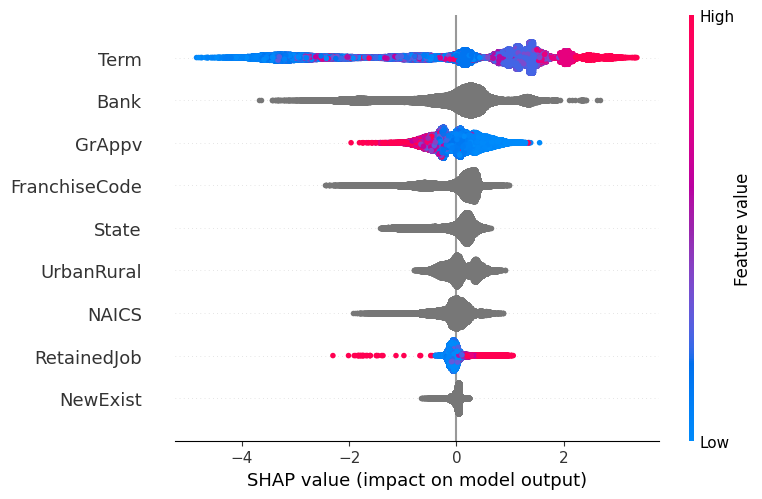

In [19]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test)

In [21]:
annee_crise = [1960,1961,1969,1970,1973,1974,1980,1981,1982,2000,2001,2007,2008]
df['Crisis'] = df['ApprovalFY'].apply(lambda x : 1 if x in annee_crise else 0)

In [22]:
# Définition des features et de la cible
features = ['State', 'NAICS',  'NewExist', 'RetainedJob', 
            'FranchiseCode', 'UrbanRural', 'GrAppv', 'Bank', 'Term']

X = df[features]
y = df['MIS_Status']

# Conversion des catégories en chaînes de caractères
cat_features = ['State', 'NAICS', 'NewExist', 'FranchiseCode', 'UrbanRural', 'Bank']
for col in cat_features:
    X[col] = X[col].astype(str)

# Remplacement des valeurs NaN
X.fillna("Unknown", inplace=True)

# Séparation en train/test avec stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=True, random_state=42, stratify=y
)

# Définition du modèle CatBoost
model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='AUC',
    verbose=100
)

# Entraînement du modèle avec déclaration des features catégoriques
model.fit(X_train, y_train, eval_set=(X_test, y_test), cat_features=cat_features)

# Prédictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Évaluation
print("\nMatrice de confusion :")
print(confusion_matrix(y_test, y_pred))
print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

# Calcul et affichage du ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC Score: {roc_auc:.4f}')


/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2019400821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2019400821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].astype(str)
/var/folders/bl/7f1kdky90j199bncllgc2ntc0000gn/T/ipykernel_47960/2019400821.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

0:	test: 0.8769011	best: 0.8769011 (0)	total: 533ms	remaining: 8m 52s
100:	test: 0.9700137	best: 0.9700137 (100)	total: 33.9s	remaining: 5m 1s
200:	test: 0.9750742	best: 0.9750742 (200)	total: 1m 9s	remaining: 4m 37s
300:	test: 0.9769730	best: 0.9769730 (300)	total: 1m 40s	remaining: 3m 54s
400:	test: 0.9779628	best: 0.9779628 (400)	total: 2m 13s	remaining: 3m 19s
500:	test: 0.9785676	best: 0.9785676 (500)	total: 2m 47s	remaining: 2m 46s
600:	test: 0.9789395	best: 0.9789395 (600)	total: 3m 21s	remaining: 2m 13s
700:	test: 0.9792336	best: 0.9792336 (700)	total: 3m 54s	remaining: 1m 40s
800:	test: 0.9794689	best: 0.9794689 (800)	total: 4m 27s	remaining: 1m 6s
900:	test: 0.9796656	best: 0.9796656 (900)	total: 5m	remaining: 33s
999:	test: 0.9798330	best: 0.9798330 (999)	total: 5m 32s	remaining: 0us

bestTest = 0.9798329912
bestIteration = 999


Matrice de confusion :
[[13178  2604]
 [ 1815 72320]]

Rapport de classification :
              precision    recall  f1-score   support

         